# Hello Home A Local Real Estate Agency of King County 

**Authors:** Monique Hercules 
***

## Overview


An analysis of a local real estate agency in King County for insights on renovation projects to increase home sales. With the knowledge acquired we will be able to predict what type of renovation will impact the sale price of home the best. 

These new insights will help predict the sale budget as well as 

The dataset in use will be from King County. 

## Business Problem

Our stakeholder are local real estate agency that help homeowners buy/sell homes. We will provide evidencial advice about how a  home renovation might increase the estimated value of their homes and by what amount. By targeting this information the real es
tate agency will have highier KPI's 

## Data Understanding 

Import revelant libraries, and inspect data 

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [176]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [178]:
numerics = ['int64', 'float64']
numerical_cols = df.select_dtypes(include=numerics)

Identifying outlires in price

In [179]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [180]:
# df_preprocessed = df.loc[df['price'] < 1000000]
df_preprocessed = df.copy()

Exploratory Data Analysis for Understanding the Distribution of the Dataset

Checking for Linearity relation for the target variable "Price"

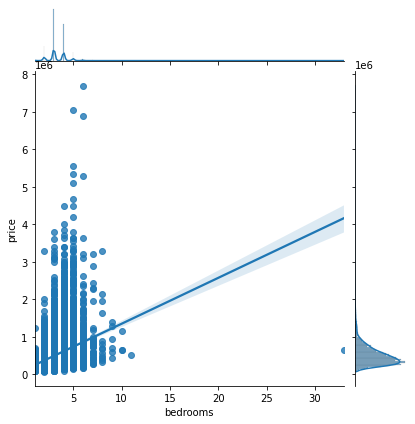

In [181]:
# df_preprocessed = df_preprocessed.loc[df_preprocessed['bedrooms'] < 9]
sns.jointplot(x='bedrooms',y='price' , data=df, kind='reg')
#No linear relation, categorical 
#With Removed outliers 

## Verifying Assumptions for Linear Regression

### Linearity

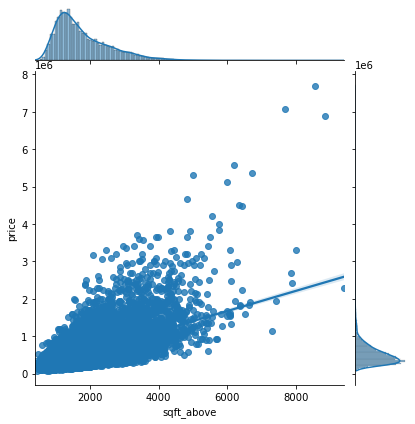

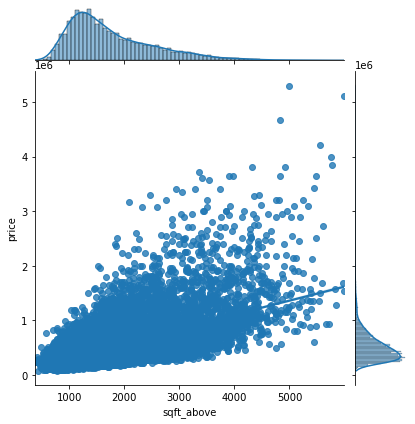

In [182]:

sns.jointplot(x='sqft_above', y='price', data=df, kind='reg' )
df = df.loc[df['sqft_above'] < 6000]
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg' )
#A linear elation, remove outliers 

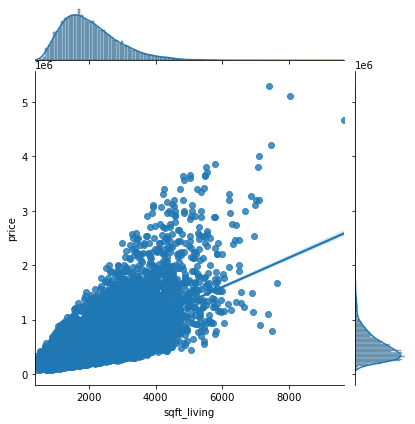

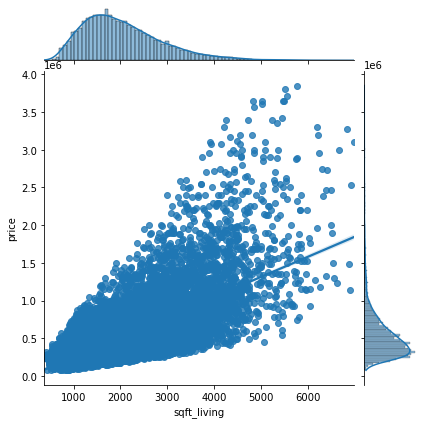

In [183]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg' )
df = df.loc[df['sqft_living'] < 7000]
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg' )
#Linear Relation 
#Remove outlier 

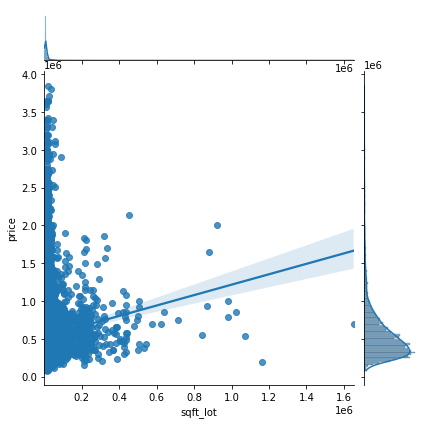

In [184]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')

#no linear relation, will not be used
#Remove outlier

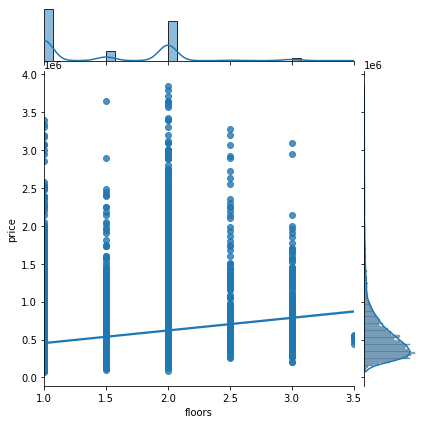

In [185]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#No linear relation
#Remove outlier, categorical 

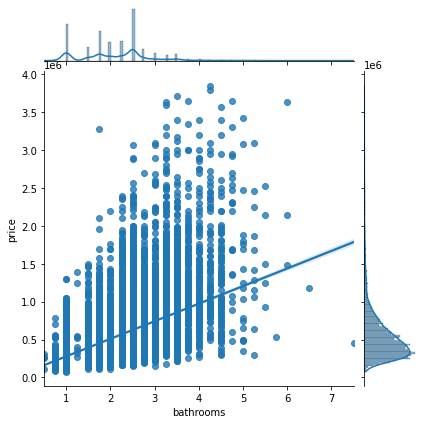

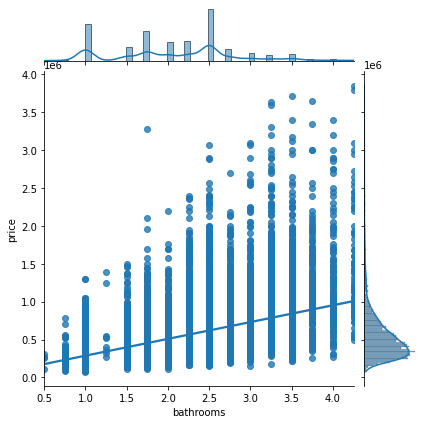

In [186]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
df = df.loc[df['bathrooms'] < 4.5]
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg' )
# plt.scatter(x='bathrooms', y='price', data=df)
#linear relation, categorical 
#Remove outlier 

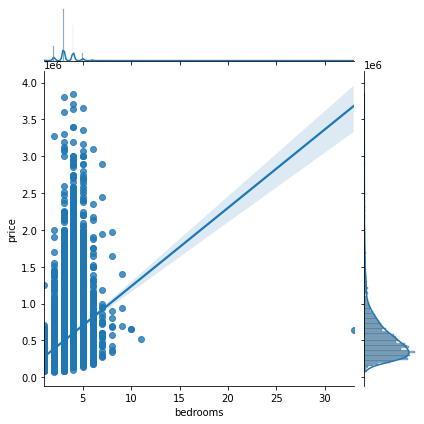

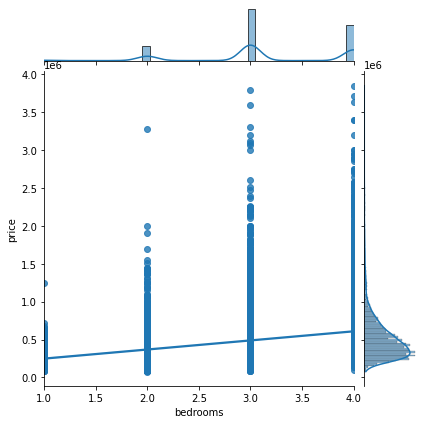

In [187]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
df = df.loc[df['bedrooms'] < 5]
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg' )
#linear relation , categorical 
#Remove outlier 

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941, 1915,
       1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984, 1922,
       1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 2014, 1925, 1989,
       1972, 1986, 1956, 2002, 1992, 1964, 1952, 2006, 1988, 1962, 1939,
       1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905, 1971, 2001, 1900,
       2010, 1945, 1924, 1990, 1914, 2004, 1923, 1961, 2007, 1976, 1949,
       1999, 1901, 1993, 1920, 1997, 1943, 1940, 1918, 1928, 1974, 1911,
       1936, 1937, 1982, 1908, 1931, 1957, 1998, 1913, 1907, 2013, 2012,
       1912, 2011, 1917, 1958, 1932, 1944, 2009, 1903, 1970, 2015, 1934,
       1938, 1926, 1919, 1906, 1902, 1935])

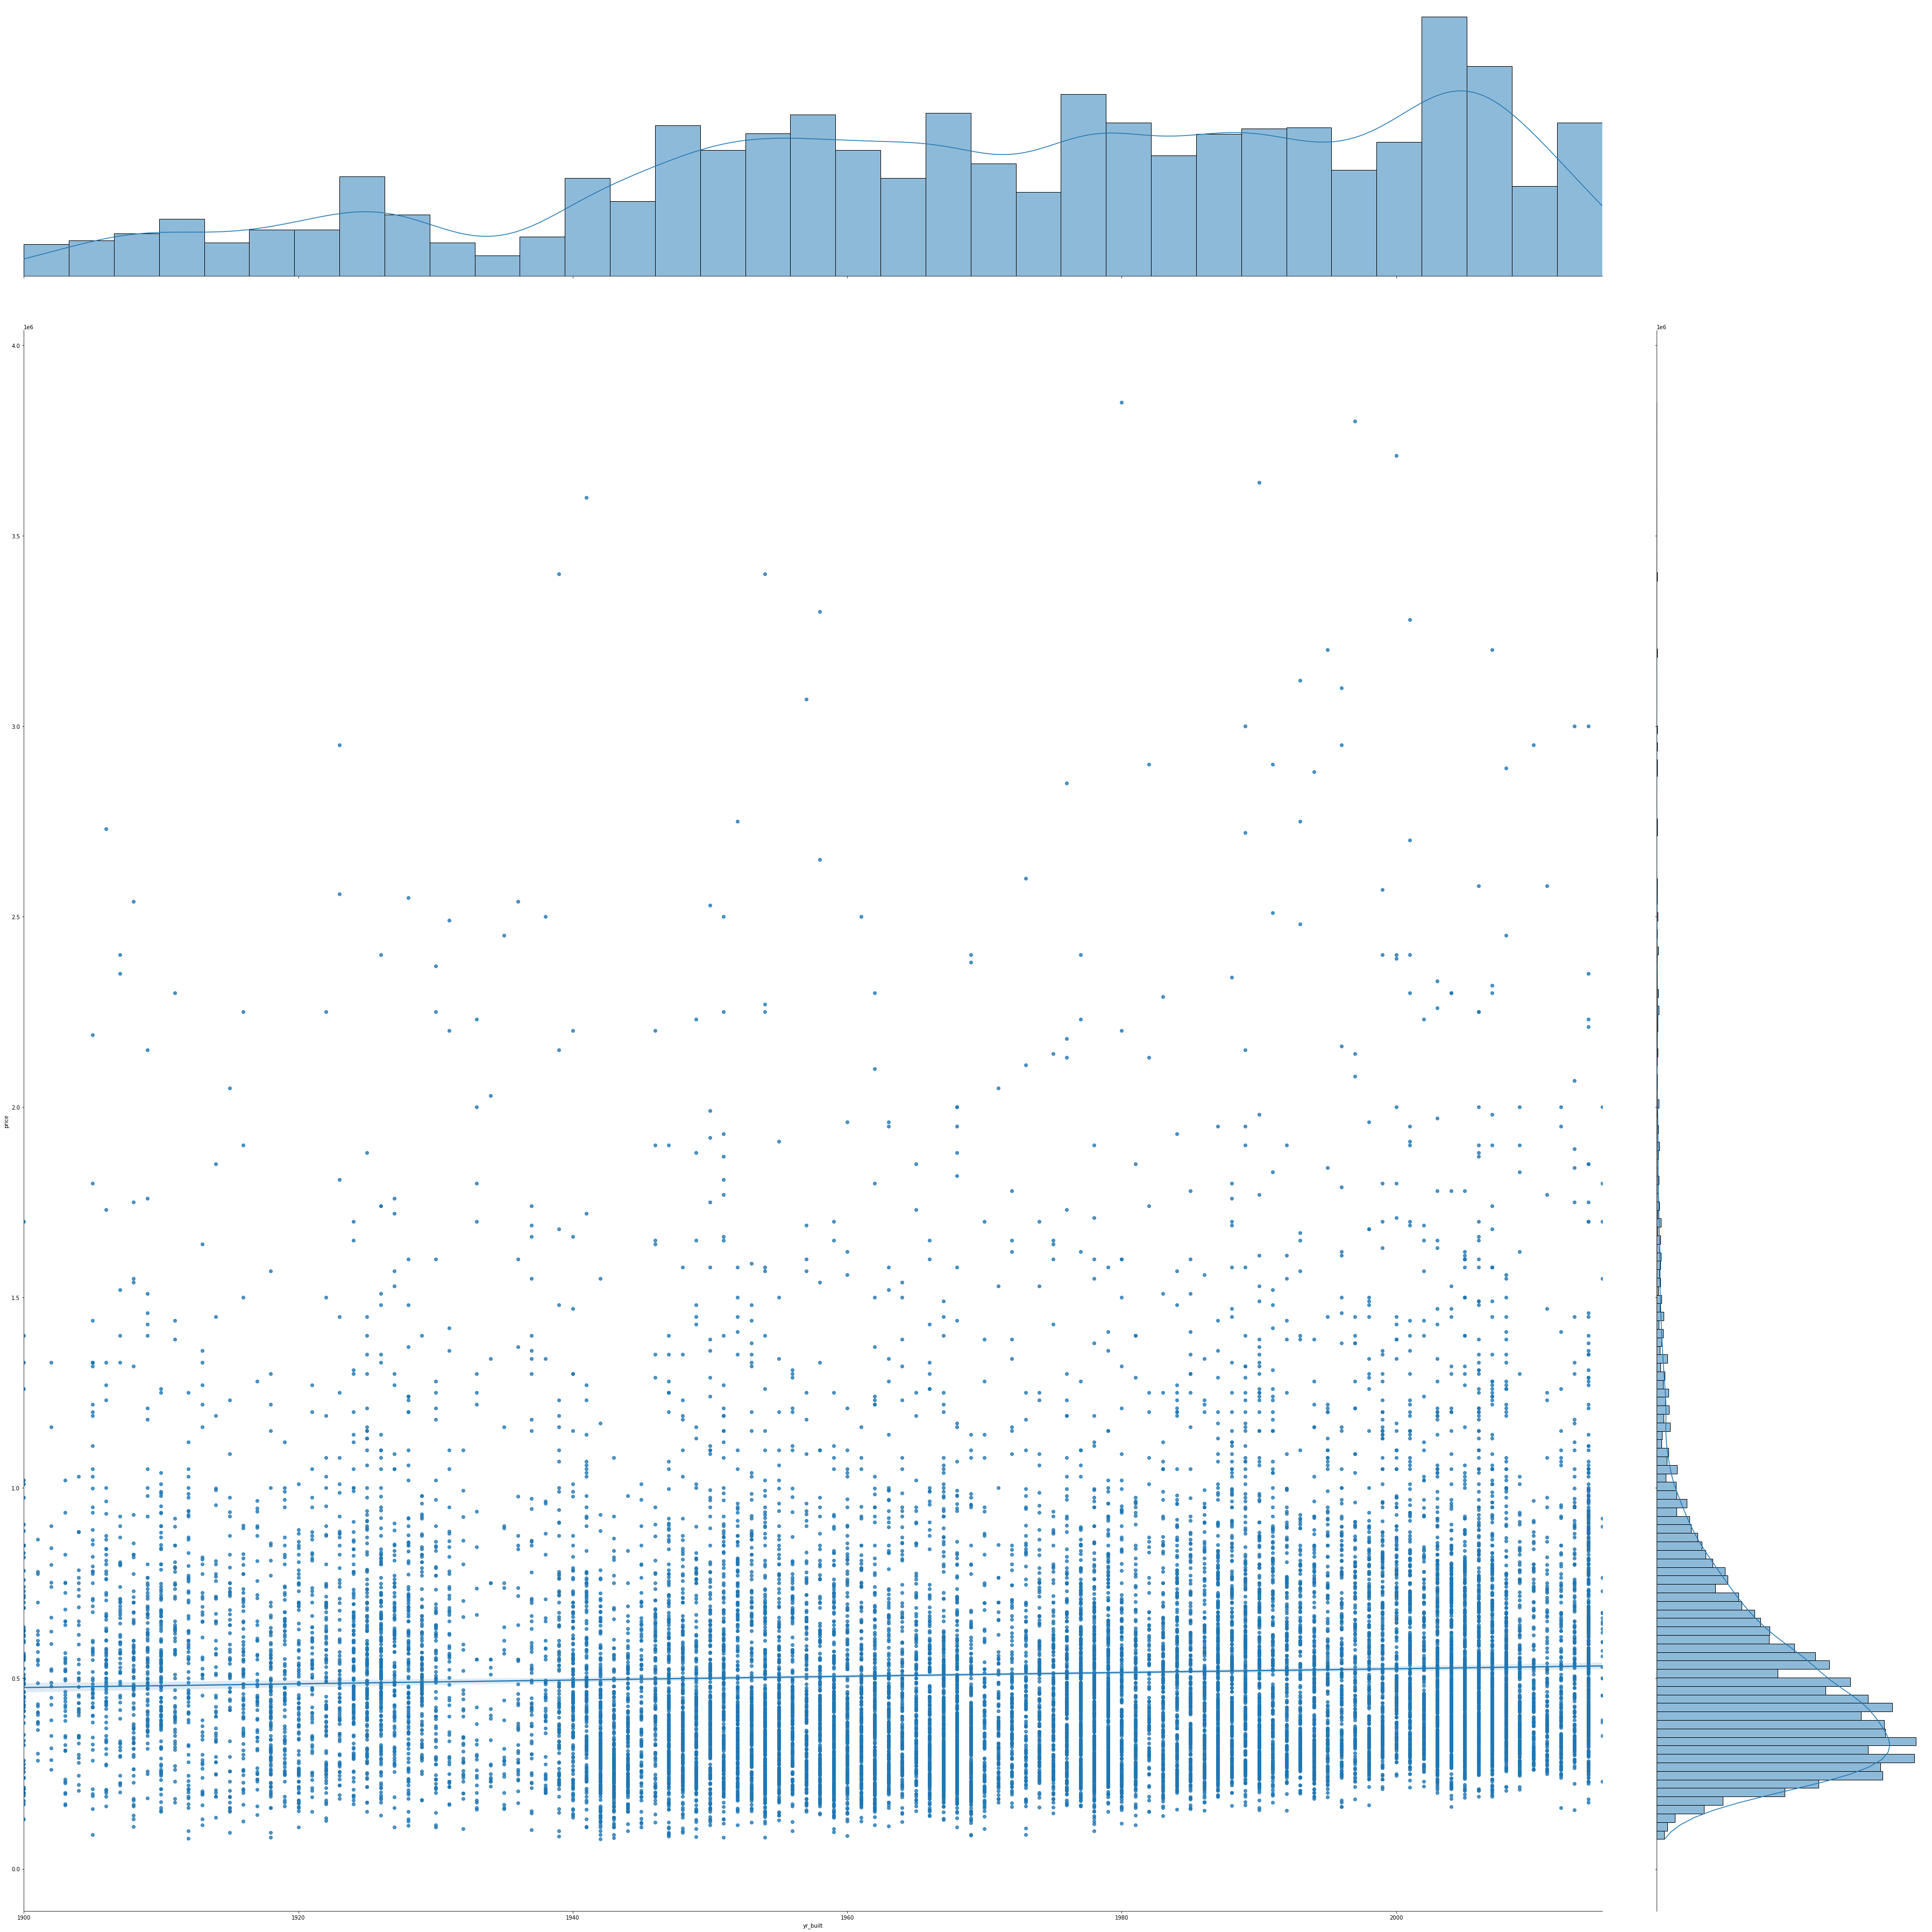

In [188]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg', height=50)
df['yr_built'].unique()
#No Linear relation, will not be used
#Remove outlier, categorical 

array([98178, 98125, 98028, 98136, 98074, 98003, 98198, 98146, 98038,
       98007, 98115, 98126, 98019, 98103, 98002, 98133, 98040, 98030,
       98119, 98112, 98052, 98027, 98117, 98058, 98107, 98001, 98056,
       98166, 98023, 98070, 98148, 98105, 98042, 98059, 98122, 98144,
       98004, 98034, 98075, 98008, 98116, 98010, 98118, 98032, 98045,
       98102, 98077, 98108, 98168, 98177, 98065, 98092, 98029, 98006,
       98109, 98022, 98033, 98155, 98024, 98011, 98053, 98031, 98106,
       98199, 98188, 98005, 98072, 98014, 98055, 98039])

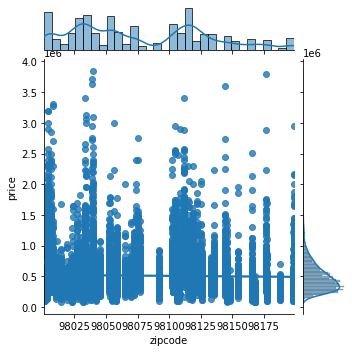

In [189]:
sns.jointplot(x='zipcode', y='price', data=df, kind='reg', height=5)
df['zipcode'].unique()

In [190]:
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '9 Better', '5 Fair',
       '10 Very Good', '12 Luxury', '11 Excellent', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [191]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

### Normality

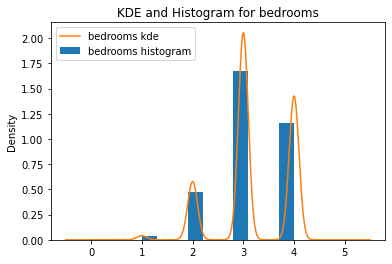

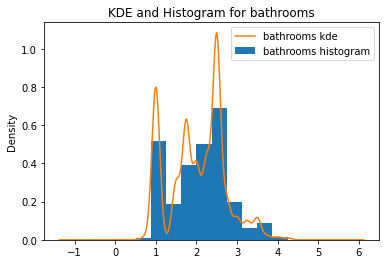

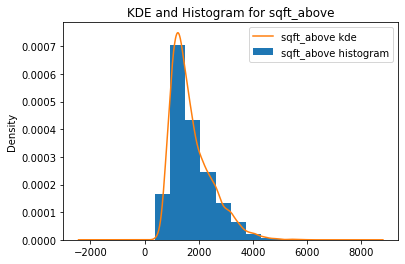

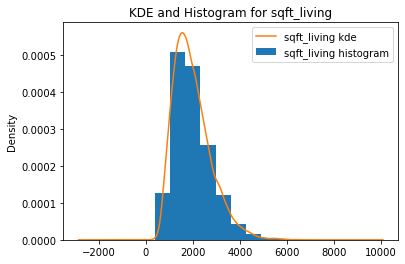

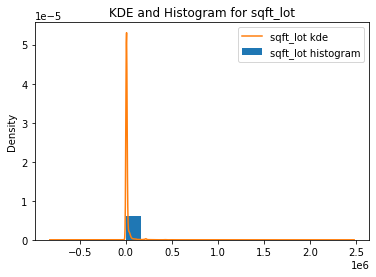

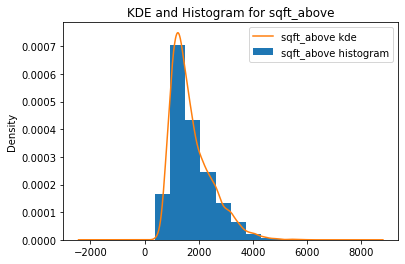

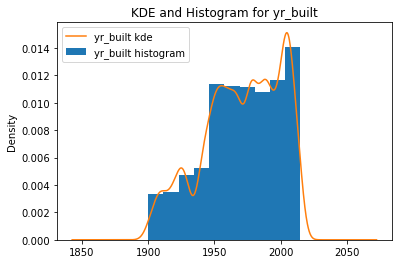

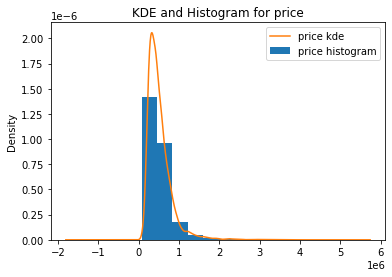

In [192]:
def plotNormality(df, column):
    df[column].plot.hist(title='KDE and Histogram for ' + column, density=True, label= column+' histogram')
    df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

numerical_features = ['bedrooms', 'bathrooms', 'sqft_above', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'price']
for column in numerical_features:
    plotNormality(df, column)

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>]], dtype=object)

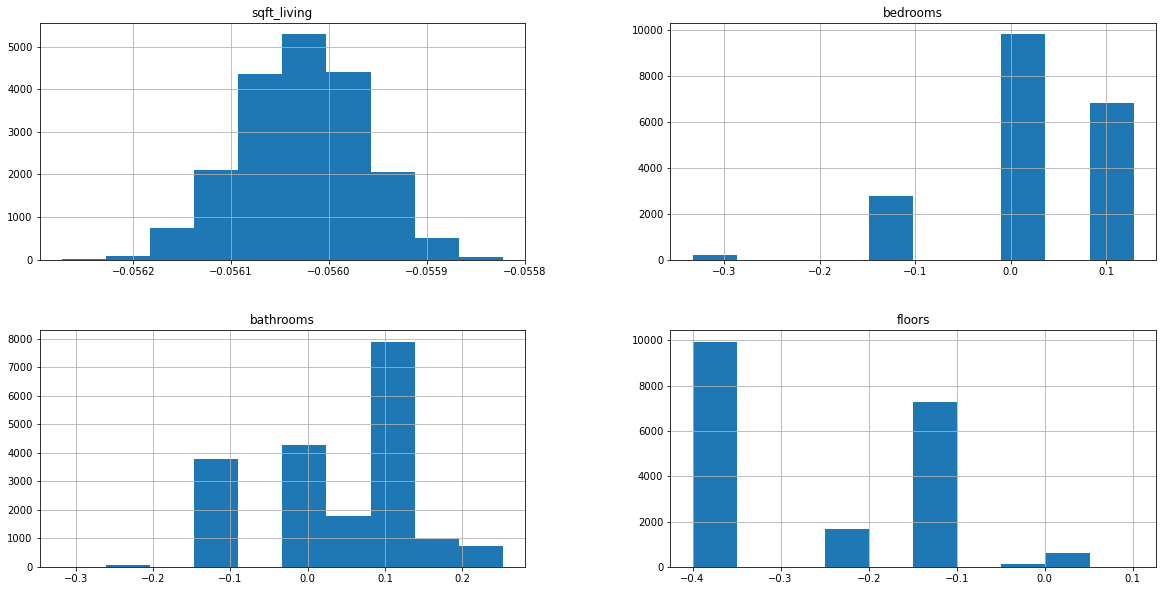

In [274]:
non_normal = ['sqft_living','bedrooms','bathrooms','floors']
df_cleaned = df.copy()
for feat in non_normal:
    min_feat = min(df[feat])
    max_feat = max(df[feat])
    df_cleaned[feat] = df[feat].map(lambda x: (((np.log(x) - min_feat) /
                                                 (max_feat - min_feat))))
df_cleaned.hist(column=non_normal, figsize=(20, 10))

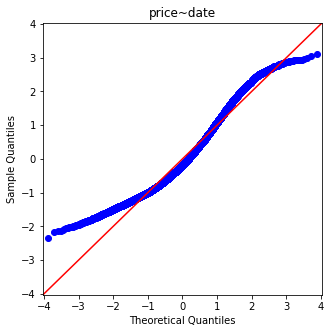

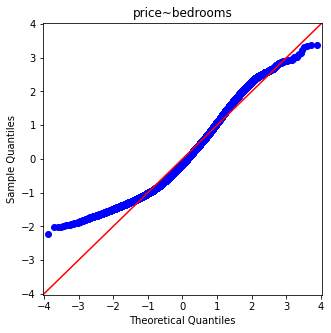

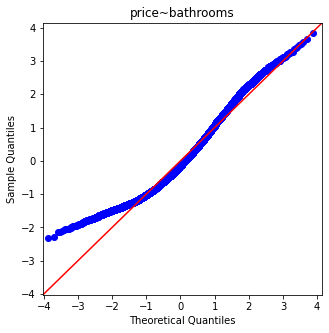

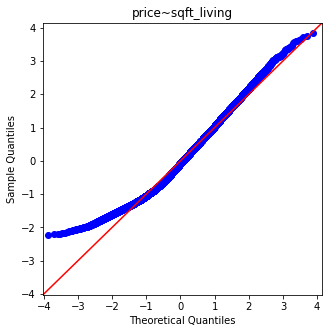

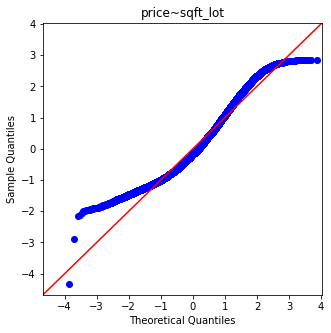

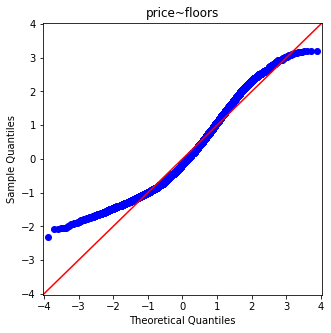

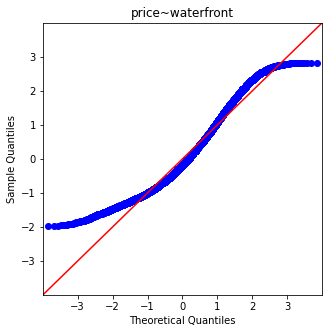

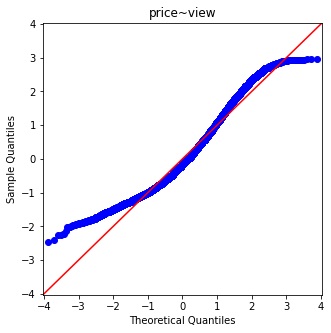

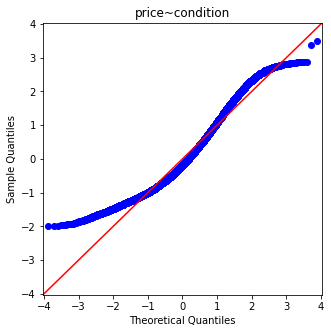

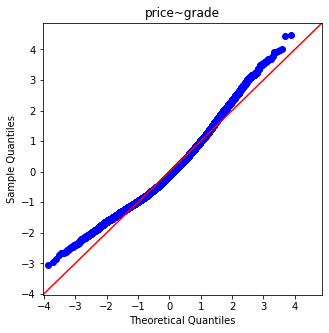

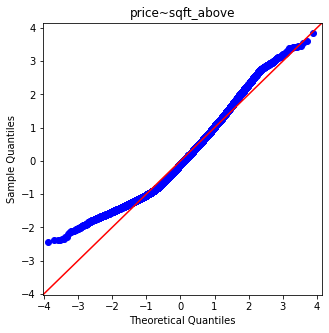

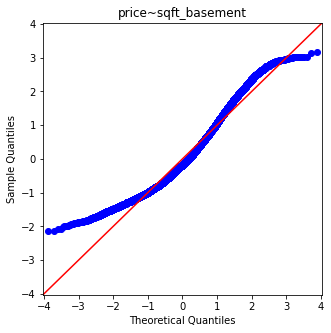

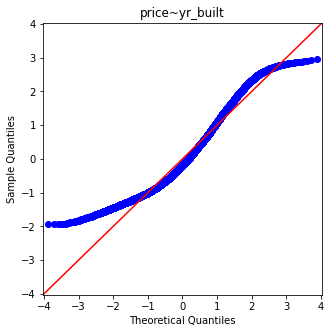

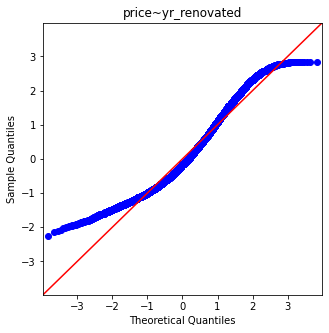

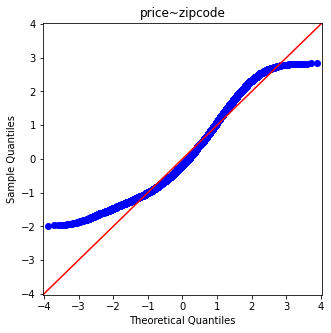

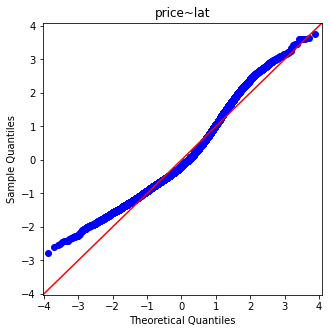

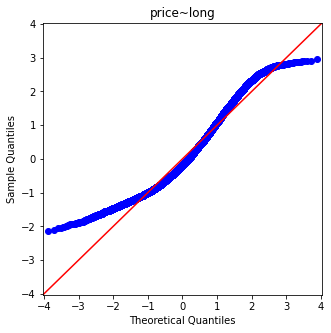

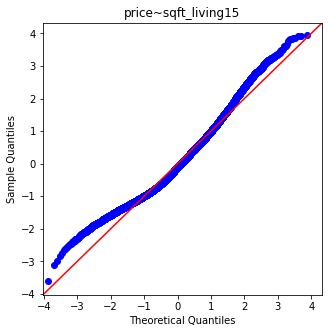

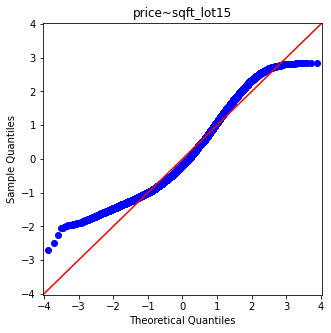

In [275]:
from statsmodels.formula.api import ols
df_cleaned = df_cleaned.loc[df_cleaned['price'] < 1_000_000]
# df_cleaned = df_cleaned.loc[df_cleaned['sqft_living'] < 10000]
# df_cleaned = df_cleaned.loc[df_cleaned['bedrooms'] < 6]
# df_cleaned = df_cleaned.loc[df_cleaned['bathrooms'] < 6]
outcome = 'price'
for col in df.columns:
    if col == outcome or col == 'id':
        continue
    formula = outcome + '~' + col
    _, ax = plt.subplots(figsize=(5,5))
    ax.set_title(formula)
    model = ols(formula=formula, data=df_cleaned).fit()
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)


/Users/momo/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


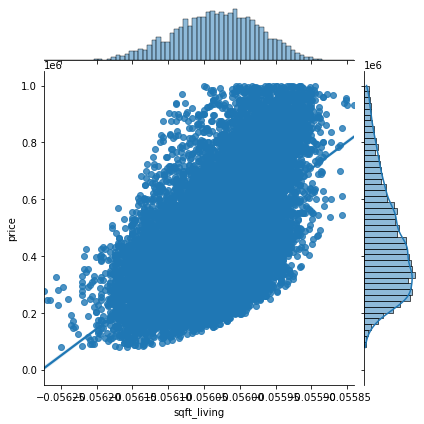

In [276]:
df_cleaned[['bedrooms', 'bathrooms', 'grade', 'sqft_living']].describe()
sns.jointplot(x='sqft_living',y='price' , data=df_cleaned, kind='reg')

#### Histogram 

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

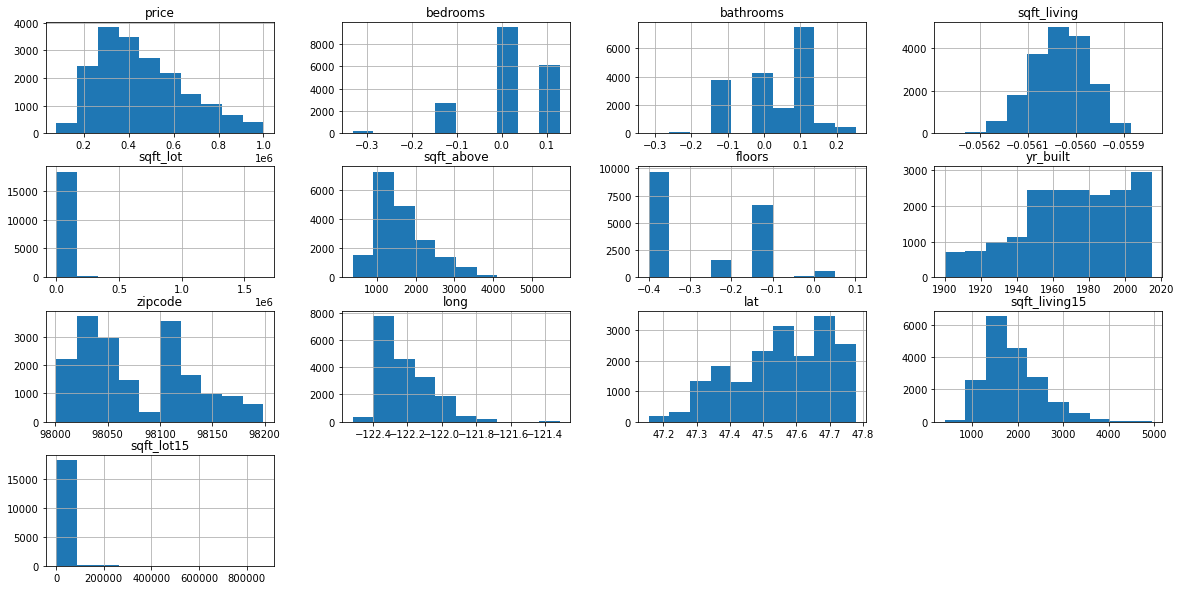

In [277]:
df_cleaned.hist(column= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'yr_built', 'zipcode', 'long', 'lat', 'sqft_living15', 'sqft_lot15'], figsize=(20,10))

#### Q Test

### Homoscedasticity

Used to identify data that has missing data and to determine which data type is each column 

## Cleaning Data 

Fixing issues wrong with data before modeling, for better accuracy. 

## Checking Data Types 

In [278]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18550 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18550 non-null  int64  
 1   date           18550 non-null  object 
 2   price          18550 non-null  float64
 3   bedrooms       18550 non-null  float64
 4   bathrooms      18550 non-null  float64
 5   sqft_living    18550 non-null  float64
 6   sqft_lot       18550 non-null  int64  
 7   floors         18550 non-null  float64
 8   waterfront     16499 non-null  object 
 9   view           18497 non-null  object 
 10  condition      18550 non-null  object 
 11  grade          18550 non-null  object 
 12  sqft_above     18550 non-null  int64  
 13  sqft_basement  18550 non-null  object 
 14  yr_built       18550 non-null  int64  
 15  yr_renovated   15246 non-null  float64
 16  zipcode        18550 non-null  int64  
 17  lat            18550 non-null  float64
 18  long  

Dropping irrelevant columns 

In [279]:
df_cleaned = df_cleaned.drop(columns=['id', 'lat', 'long', 'sqft_above', 'waterfront','date', 'view', 'sqft_basement','yr_built', 'sqft_lot', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade
0,221900.0,0.032871,-0.133333,-0.056094,-0.400000,Average,7 Average
1,538000.0,0.032871,0.082915,-0.055973,-0.122741,Average,7 Average
2,180000.0,-0.102284,-0.133333,-0.056160,-0.400000,Average,6 Low Average
3,604000.0,0.128765,0.159630,-0.056015,-0.400000,Very Good,7 Average
4,510000.0,0.032871,0.051506,-0.056039,-0.400000,Average,8 Good


In [280]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18550 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18550 non-null  float64
 1   bedrooms     18550 non-null  float64
 2   bathrooms    18550 non-null  float64
 3   sqft_living  18550 non-null  float64
 4   floors       18550 non-null  float64
 5   condition    18550 non-null  object 
 6   grade        18550 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [281]:
df_cleaned.shape

(18550, 7)

### Checking for missing values 

In [282]:
df_cleaned.isna().sum()
#All the columns that have null values are not going to be used, but dropped earlier on  

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
dtype: int64

In [283]:
df_cleaned.shape 

(18550, 7)

## Checking for multicollinearity 

In [284]:

# Does Multicollinearity exists between the house features
df_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,floors
count,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000
mean,458549.060000,0.040812,0.032279,-0.056032,-0.272318
std,192127.699223,0.084064,0.100099,0.000059,0.140759
min,78000.000000,-0.333333,-0.318173,-0.056273,-0.400000
25%,308000.000000,0.032871,-0.025209,-0.056073,-0.400000
50%,425000.000000,0.032871,0.051506,-0.056030,-0.400000
75%,579837.500000,0.128765,0.111011,-0.055990,-0.122741
max,999999.000000,0.128765,0.252512,-0.055841,0.101105


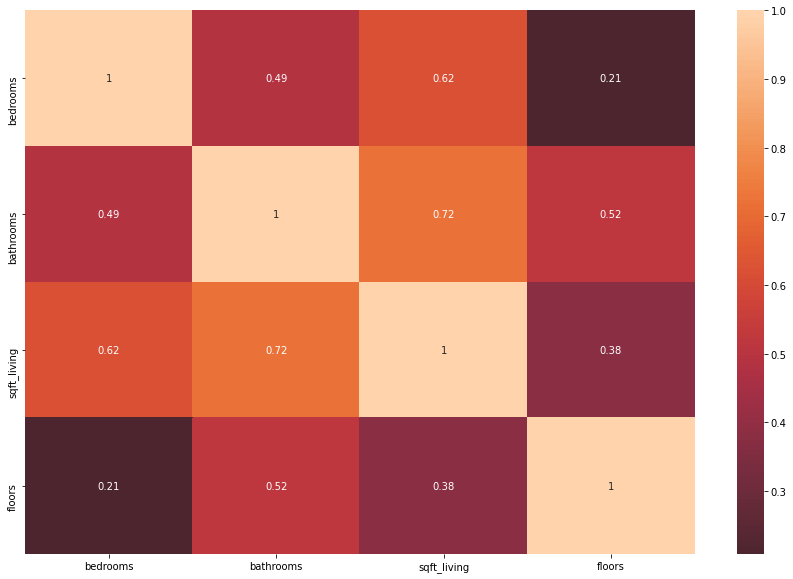

In [285]:
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
corr = df_cleaned[feats].corr()

_, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, center=0, annot=True, ax=ax);
#Need to add analysis 

In [286]:
df_temp = df_cleaned.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_temp['pairs'] = list(zip(df_temp.level_0, df_temp.level_1))

df_temp.set_index(['pairs'], inplace = True)

df_temp.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_temp.columns = ['cc']

df_temp.drop_duplicates(inplace=True)

df_temp[(df_temp.cc>.75) & (df_temp.cc<1)]

,cc
pairs,


Dropping bathrooms and sqft above because multi corr 

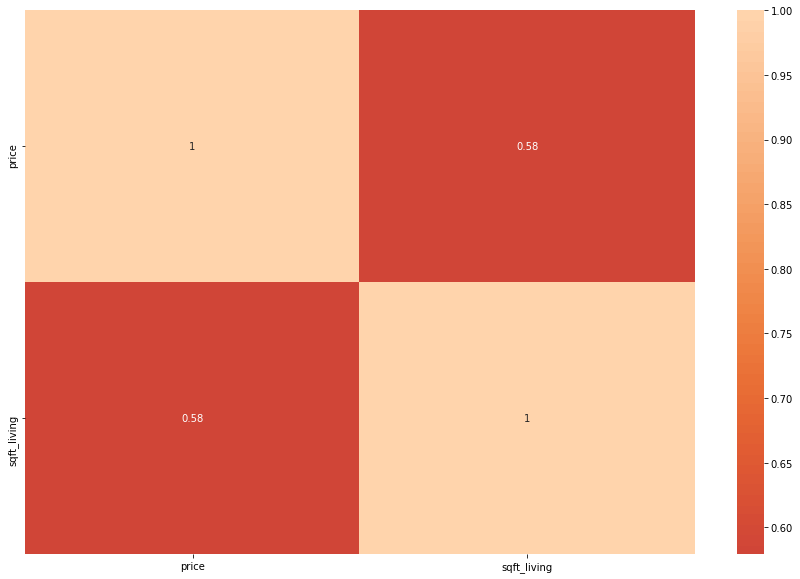

In [287]:
feats = ['price', 'sqft_living']
corr = df_cleaned[feats].corr()
_, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, center=0, annot=True, ax=ax);

## Normalizing the Data 

## Determining Numeric and Catagorical features

In [288]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18550 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18550 non-null  float64
 1   bedrooms     18550 non-null  float64
 2   bathrooms    18550 non-null  float64
 3   sqft_living  18550 non-null  float64
 4   floors       18550 non-null  float64
 5   condition    18550 non-null  object 
 6   grade        18550 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [289]:
#Saved cleaned data 
df_cleaned.to_csv("data/kc_house_data_cleaned.csv", index=False)

 ## One Hot Encoding

This is preprocessing 

In [290]:
# beds_dummy = pd.get_dummies(df_cleaned['bedrooms'],
#                             prefix='bed',
#                             drop_first=True)
# baths_dummy = pd.get_dummies(df_cleaned['bathrooms'],
#                              prefix='bath',
#                              drop_first=True)
cnd_dummy = pd.get_dummies(df_cleaned['condition'],
                           prefix='cnd',
                           drop_first=True)
grp_dummy = pd.get_dummies(df_cleaned['grade'], prefix='grd', drop_first=True)


In [291]:
# df_cleaned = df_cleaned.drop(['bedrooms', 'bathrooms', 'condition', 'grade'],
#                              axis=1)
df_cleaned = df_cleaned.drop(['condition', 'grade'], axis=1)

In [292]:
# df_categorical_cleaned = pd.concat(
#     [df_cleaned, beds_dummy, baths_dummy, cnd_dummy, grp_dummy], axis=1)
df_categorical_cleaned = pd.concat(
    [df_cleaned, cnd_dummy, grp_dummy], axis=1)
df_categorical_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18550 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              18550 non-null  float64
 1   bedrooms           18550 non-null  float64
 2   bathrooms          18550 non-null  float64
 3   sqft_living        18550 non-null  float64
 4   floors             18550 non-null  float64
 5   cnd_Fair           18550 non-null  uint8  
 6   cnd_Good           18550 non-null  uint8  
 7   cnd_Poor           18550 non-null  uint8  
 8   cnd_Very Good      18550 non-null  uint8  
 9   grd_11 Excellent   18550 non-null  uint8  
 10  grd_12 Luxury      18550 non-null  uint8  
 11  grd_3 Poor         18550 non-null  uint8  
 12  grd_4 Low          18550 non-null  uint8  
 13  grd_5 Fair         18550 non-null  uint8  
 14  grd_6 Low Average  18550 non-null  uint8  
 15  grd_7 Average      18550 non-null  uint8  
 16  grd_8 Good         185

In [293]:

df_categorical_cleaned.columns = df_categorical_cleaned.columns.str.replace('.', '_')
df_categorical_cleaned.columns = df_categorical_cleaned.columns.str.replace(' ', '_')
df_categorical_cleaned.columns = df_categorical_cleaned.columns.str.replace('-', '_')
df_categorical_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'cnd_Fair',
       'cnd_Good', 'cnd_Poor', 'cnd_Very_Good', 'grd_11_Excellent',
       'grd_12_Luxury', 'grd_3_Poor', 'grd_4_Low', 'grd_5_Fair',
       'grd_6_Low_Average', 'grd_7_Average', 'grd_8_Good', 'grd_9_Better'],
      dtype='object')

## Modeling 

Fitting the Initial Model 

In [294]:
df_categorical_cleaned = sm.add_constant(df_categorical_cleaned)

In [295]:
outcome = 'price'
#change x_cols for intial model 
#Need to add floors back after the merge, 
#cols_minus_price=
x_cols = df_categorical_cleaned.columns.tolist()
x_cols.remove('price')
x_cols

['const',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Poor',
 'cnd_Very_Good',
 'grd_11_Excellent',
 'grd_12_Luxury',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better']

Importing statsmodel ols for modeling 

In [296]:
from statsmodels.formula.api import ols 

In [297]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     924.3
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:42:08   Log-Likelihood:            -2.4630e+05
No. Observations:               18550   AIC:                         4.926e+05
Df Residuals:                   18532   BIC:                         4.928e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.386e+17   1.68e+17      0.825      0.409   -1.91e+17    4.68e+17
const             -1.386e+17   1.68e+17     -0.825      0.409   -4.68e+17    1.91e+17
bedrooms          -2.387e+05   1.61e+04    -14.801      0.000    -2.7e+05   -2.07e+05
bathrooms         -1.546e+05   1.69e+04     -9.165      0.000   -1.88e+05   -1.22e+05
sqft_living         1.31e+09   3.23e+07     40.585      0.000    1.25e+09    1.37e+09
floors             2.316e+04   9267.643      2.499      0.012    4998.178    4.13e+04
cnd_Fair          -2.488e+04   1.12e+04     -2.215      0.027   -4.69e+04   -2868.532
cnd_Good           3.465e+04   2525.012     13.723      0.000    2.97e+04    3.96e+04
cnd_Poor           8513.2317   2.75e+04      0.310      0.757   -4.53e+04    6.24e+04
cnd_Very_Good      9.593e+04   4125.850     23.252      0.000    8.78e+04    1.04e+05
grd_11_Excellent   7.779e+04   1.79e+04      4.358      0.000    4.28e+04    1.13e+05
grd_12_Luxury      2723.5175   1.42e+05      0.019      0.985   -2.75e+05     2.8e+05
grd_3_Poor         -3.86e+05   1.42e+05     -2.723      0.006   -6.64e+05   -1.08e+05
grd_4_Low         -3.564e+05   2.86e+04    -12.469      0.000   -4.12e+05      -3e+05
grd_5_Fair        -3.684e+05   1.21e+04    -30.447      0.000   -3.92e+05   -3.45e+05
grd_6_Low_Average -3.412e+05   7918.147    -43.089      0.000   -3.57e+05   -3.26e+05
grd_7_Average     -2.802e+05   6701.064    -41.815      0.000   -2.93e+05   -2.67e+05
grd_8_Good        -1.941e+05   6347.854    -30.576      0.000   -2.07e+05   -1.82e+05
grd_9_Better      -8.651e+04   6609.003    -13.089      0.000   -9.95e+04   -7.36e+04
==============================================================================
Omnibus:                      743.910   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.776
Skew:                           0.495   Prob(JB):                    9.85e-184
Kurtosis:                       3.331   Cond. No.                     3.61e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.54e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Initial Refinement 

In [298]:
# Removing P values greater than 0.05 with a function
def removingHighPValues(columns):
    for col in df_categorical_cleaned.columns.tolist():
        if col in columns and col in x_cols and model.pvalues[col] >= 0.05:
            columns.remove(col)
removingHighPValues(x_cols)
x_cols
#Figure out how to interpret the coefficients, topic 19- this is to give re regression diagnositic, simple liner regression vidoes
#or 18 

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_11_Excellent',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better']

In [299]:

#bedrooms
#change x_cols for intial refinement model 
#Add floors, removed bedrooms from the 6, its 5 with floors. -5 
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:42:22   Log-Likelihood:            -2.4630e+05
No. Observations:               18550   AIC:                         4.926e+05
Df Residuals:                   18534   BIC:                         4.928e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.414e+07   1.81e+06     41.011      0.000    7.06e+07    7.77e+07
bedrooms          -2.389e+05   1.61e+04    -14.815      0.000    -2.7e+05   -2.07e+05
bathrooms         -1.546e+05   1.69e+04     -9.164      0.000   -1.88e+05   -1.21e+05
sqft_living        1.311e+09   3.23e+07     40.598      0.000    1.25e+09    1.37e+09
floors             2.315e+04   9266.789      2.498      0.013    4982.854    4.13e+04
cnd_Fair          -2.492e+04   1.12e+04     -2.220      0.026   -4.69e+04   -2916.141
cnd_Good           3.465e+04   2522.892     13.736      0.000    2.97e+04    3.96e+04
cnd_Very_Good      9.591e+04   4124.298     23.256      0.000    8.78e+04    1.04e+05
grd_11_Excellent   7.778e+04   1.78e+04      4.358      0.000    4.28e+04    1.13e+05
grd_3_Poor         -3.86e+05   1.42e+05     -2.723      0.006   -6.64e+05   -1.08e+05
grd_4_Low         -3.561e+05   2.86e+04    -12.466      0.000   -4.12e+05      -3e+05
grd_5_Fair         -3.68e+05    1.2e+04    -30.542      0.000   -3.92e+05   -3.44e+05
grd_6_Low_Average -3.411e+05   7913.781    -43.101      0.000   -3.57e+05   -3.26e+05
grd_7_Average     -2.802e+05   6697.607    -41.831      0.000   -2.93e+05   -2.67e+05
grd_8_Good        -1.941e+05   6343.889    -30.592      0.000   -2.07e+05   -1.82e+05
grd_9_Better      -8.648e+04   6604.735    -13.094      0.000   -9.94e+04   -7.35e+04
==============================================================================
Omnibus:                      744.213   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.165
Skew:                           0.495   Prob(JB):                    8.11e-184
Kurtosis:                       3.331   Cond. No.                     3.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking for Mulitcollinearity for initial model 

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [301]:
X = df_categorical_cleaned[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(X, vif))

[('bedrooms', 1.7033745064207344),
 ('bathrooms', 2.395695566179647),
 ('sqft_living', 37.41614695179257),
 ('floors', 7.445641144525079),
 ('cnd_Fair', 1.0342499832486132),
 ('cnd_Good', 1.556049336091093),
 ('cnd_Very_Good', 1.1713389756079269),
 ('grd_11_Excellent', 1.1150506343765736),
 ('grd_3_Poor', 1.0046716884448172),
 ('grd_4_Low', 1.08103628764609),
 ('grd_5_Fair', 1.5600167704654404),
 ('grd_6_Low_Average', 5.341028637476375),
 ('grd_7_Average', 16.35793673363499),
 ('grd_8_Good', 9.972650419806309),
 ('grd_9_Better', 4.214502722921165)]

In [302]:
#Created a function for checking and removing variance less than 10 
def varianceCheck(variance_inflation):
    cols = []
    for col, val in variance_inflation:
        if col == 'const' or val < 10:
            cols.append(col)
    return cols

x_cols_variance = varianceCheck(list(zip(x_cols, vif)))
#change for the original one 
x_cols_variance
#change to add constant ADD_constant 

['bedrooms',
 'bathrooms',
 'floors',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_11_Excellent',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_8_Good',
 'grd_9_Better']

In [303]:
outcome = 'price'

#Bedrooms, 
#change x_cols for refinement model 

predictors = '+'.join(x_cols_variance)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     625.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:42:27   Log-Likelihood:            -2.4863e+05
No. Observations:               18550   AIC:                         4.973e+05
Df Residuals:                   18536   BIC:                         4.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.165e+05   3613.687    115.258      0.000    4.09e+05    4.24e+05
bedrooms           8.261e+04   1.64e+04      5.030      0.000    5.04e+04    1.15e+05
bathrooms          3.097e+05    1.7e+04     18.208      0.000    2.76e+05    3.43e+05
floors              6.72e+04   1.04e+04      6.470      0.000    4.68e+04    8.76e+04
cnd_Fair          -3.091e+04   1.27e+04     -2.429      0.015   -5.59e+04   -5969.021
cnd_Good           3.553e+04   2852.361     12.458      0.000    2.99e+04    4.11e+04
cnd_Very_Good       8.69e+04   4664.197     18.632      0.000    7.78e+04     9.6e+04
grd_11_Excellent   4.014e+05   1.94e+04     20.729      0.000    3.63e+05    4.39e+05
grd_3_Poor        -1.219e+05    1.6e+05     -0.760      0.447   -4.36e+05    1.92e+05
grd_4_Low         -1.195e+05   3.12e+04     -3.832      0.000   -1.81e+05   -5.84e+04
grd_5_Fair        -1.242e+05   1.09e+04    -11.407      0.000   -1.46e+05   -1.03e+05
grd_6_Low_Average -8.517e+04   4306.552    -19.778      0.000   -9.36e+04   -7.67e+04
grd_8_Good         6.712e+04   2991.925     22.434      0.000    6.13e+04     7.3e+04
grd_9_Better       2.031e+05   4368.833     46.499      0.000    1.95e+05    2.12e+05
==============================================================================
Omnibus:                     1261.573   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.116
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       3.282   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see the coef is off so we corrct it

In [304]:
# predictors_df = sm.add_constant(df_categorical_cleaned[x_cols_variance])
#predictors_df = sm.add_constant(df_categorical_cleaned)
#What does this line mean
vif = [
    variance_inflation_factor(predictors_df.values, i)
    for i in range(predictors_df.shape[1])
]
list(zip(x_cols_variance, vif))
#change for the new one add a constant to x before passinf into function sms.add contsant

[('bedrooms', 4788.981909829062),
 ('bathrooms', 1.888712571475853),
 ('floors', 3.488928577208579),
 ('cnd_Fair', 13.798066633267258),
 ('cnd_Good', 27.58043731980629),
 ('cnd_Very_Good', 25.625134845563426),
 ('grd_11_Excellent', 18.803862451246747),
 ('grd_3_Poor', 756.5783620504798),
 ('grd_4_Low', 2.7530575467457705),
 ('grd_5_Fair', 319.5650457676241),
 ('grd_6_Low_Average', 607.0631643225611),
 ('grd_8_Good', 401.7410134511842),
 ('grd_9_Better', 412.2415648786825)]

In [306]:
outcome = 'price'
#change x_cols for refinement model 2 
predictors = '+'.join(x_cols_variance)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=df_categorical_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     625.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:45:02   Log-Likelihood:            -2.4863e+05
No. Observations:               18550   AIC:                         4.973e+05
Df Residuals:                   18536   BIC:                         4.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.165e+05   3613.687    115.258      0.000    4.09e+05    4.24e+05
bedrooms           8.261e+04   1.64e+04      5.030      0.000    5.04e+04    1.15e+05
bathrooms          3.097e+05    1.7e+04     18.208      0.000    2.76e+05    3.43e+05
floors              6.72e+04   1.04e+04      6.470      0.000    4.68e+04    8.76e+04
cnd_Fair          -3.091e+04   1.27e+04     -2.429      0.015   -5.59e+04   -5969.021
cnd_Good           3.553e+04   2852.361     12.458      0.000    2.99e+04    4.11e+04
cnd_Very_Good       8.69e+04   4664.197     18.632      0.000    7.78e+04     9.6e+04
grd_11_Excellent   4.014e+05   1.94e+04     20.729      0.000    3.63e+05    4.39e+05
grd_3_Poor        -1.219e+05    1.6e+05     -0.760      0.447   -4.36e+05    1.92e+05
grd_4_Low         -1.195e+05   3.12e+04     -3.832      0.000   -1.81e+05   -5.84e+04
grd_5_Fair        -1.242e+05   1.09e+04    -11.407      0.000   -1.46e+05   -1.03e+05
grd_6_Low_Average -8.517e+04   4306.552    -19.778      0.000   -9.36e+04   -7.67e+04
grd_8_Good         6.712e+04   2991.925     22.434      0.000    6.13e+04     7.3e+04
grd_9_Better       2.031e+05   4368.833     46.499      0.000    1.95e+05    2.12e+05
==============================================================================
Omnibus:                     1261.573   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.116
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       3.282   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check for Normality 

In [307]:
import statsmodels.api as sm 
import scipy.stats as stats 

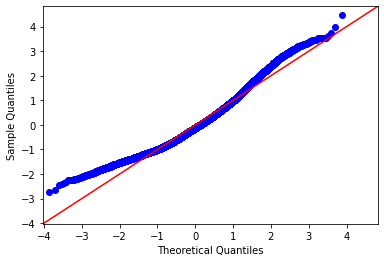

In [308]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Checking for Homoscedasticity 

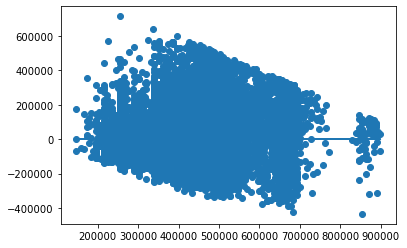

In [309]:
plt.scatter(model.predict(df_categorical_cleaned[x_cols]), model.resid)
plt.plot(model.predict(df_categorical_cleaned[x_cols]),[0 for i in range(len(df_categorical_cleaned))])

## Data Modeling


## Model Refinement 3 

In [53]:
#Finding a cutoff point 
#for i in range (90,99):
 #   q = i/100
  #  print('{} percentile:{}'.format(q, df_categorical_cleaned['price'].quantile(q=q)))

In [54]:
#subset = normalized_df[normalized_df['price'] <38]
#print ("Percent removed:", len(normalized_df)- len(subset))/len(normalized_df)
#outcome = 'price'
#x_cols = x_cols = ['bathrooms','bedrooms']
#change x_cols for refinement model 2 
#predictors = '+'.join(x_cols)
#formula = outcome + '~' + predictors 
#model = ols(formula=formula, data=df_categorical_cleaned).fit()
#model.summary()

## Rechecking Normality 

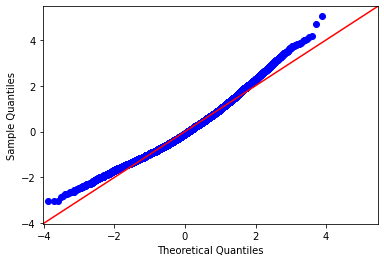

In [55]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True )

## Rechecking Homoscedasticity

In [56]:
plt.scatter(model.predict(normalized_df[x_cols]), model.resid)
plt.plot(model.predict(normalized_df[x_cols]),[0 for i in range(len(normalized_df))])

NameError: name 'normalized_df' is not defined

In [57]:
y = normalized_df['price']
X = normalized_df.drop('price',axis=1)

NameError: name 'normalized_df' is not defined

 The prediction target for this analysis is the , so we are going to split the data into two sets fro training and testing 

In [58]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state =42)

NameError: name 'y' is not defined

For this project, you will use multiple linear regression modeling to analyze house sales in a northwestern county.

Key Points

## Regression Results 

## Conclusion


Recommendations 

## Next Steps 